# CNTNAP2

[Pitt-Hopkins like syndrome 1 (PTHSL1)](https://omim.org/entry/610042) is  an autosomal recessive neurodevelopmental disorder. The syndrome is caused by pathogenic variants in the [CNTNAP2](https://omim.org/entry/604569) gene.

[D'Onofrio et al. (2023)](https://pubmed.ncbi.nlm.nih.gov/37183190/) compared monoallelic and biallelic cases:

> Overall, GDD (p < 0.0001), epilepsy (p < 0.0001), hyporeflexia (p = 0.012), ASD (p = 0.009), language impairment (p = 0.020) and severe cognitive impairment (p = 0.031) were significantly associated with the presence of biallelic versus monoallelic variants.

> Therefore, we tested the phenotypic spectrum of cases with monoallelic and biallelic variants in CNTNAP2. We curated all of the cases used in the 
[D'Onofrio et al. (2023)](https://pubmed.ncbi.nlm.nih.gov/37183190/) publication.

## Imports 

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using genophenocorr version 0.9.6.dev0


## CNTNAP2
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for CNTNAP2.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service

gene_symbol = 'CNTNAP2'
mane_tx_id = 'NM_014141.6'
mane_protein_id = 'NP_054860.1' # contactin-associated protein-like 2 precursor
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [4]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.24') as ps:
        phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc_results = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
qc_results.summarize()

Individuals Processed: 100%|██████████| 63/63 [00:37<00:00,  1.68 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [5]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
51,Intellectual disability
51,Delayed speech and language development
48,Global developmental delay
30,EEG abnormality
16,Hypotonia
16,Seizure
14,Aggressive behavior
13,Autistic behavior
12,Delayed gross motor development
12,Bilateral tonic-clonic seizure


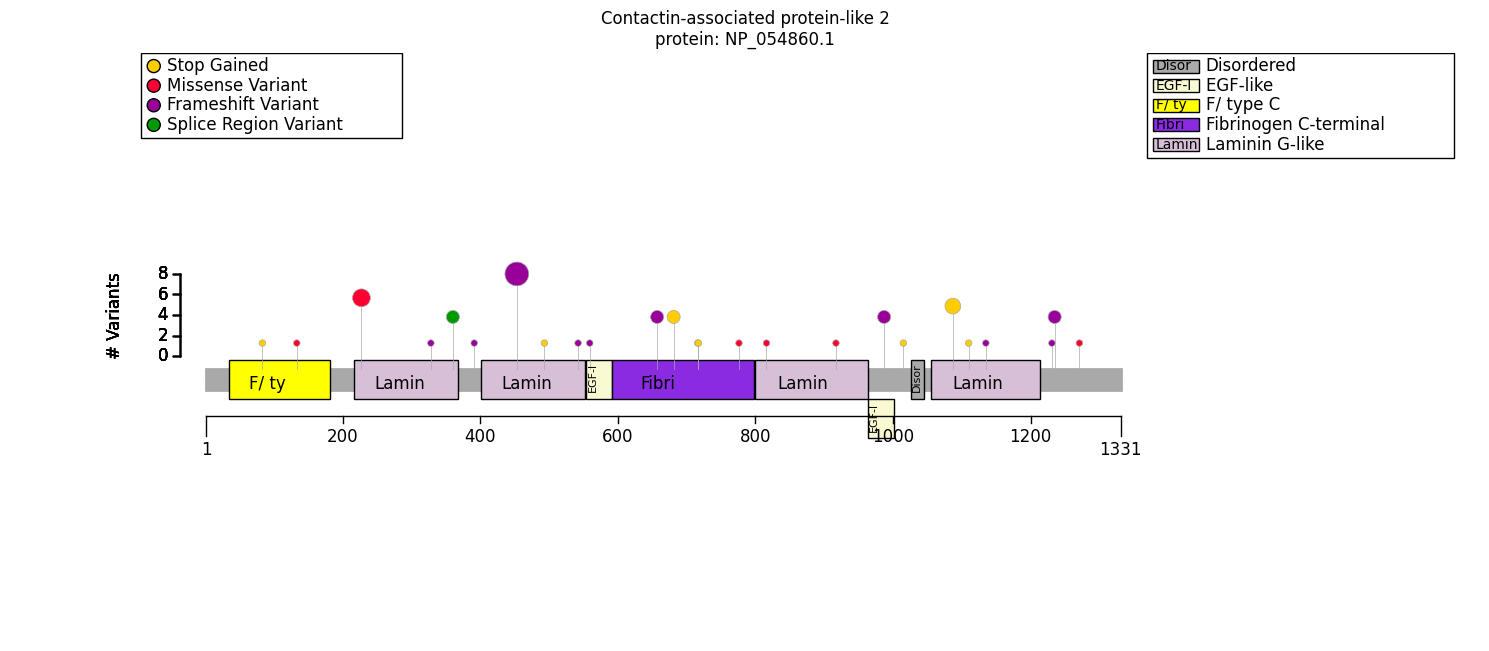

In [6]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

CNTNAP2_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
CNTNAP2_fig.tight_layout()

In [7]:
from gpsea.view import ProteinVariantViewer
viewer = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
viewer.process(cohort)

Count,Name,Type,Coordinates,Variants
2,F5/8 type C,Domain,36 - 181,p.Trp84Ter; p.Trp134Gly
7,Laminin G-like 1,Domain,217 - 368,p.Ser329ValfsTer28; p.Gly228Arg; p.Val361=
10,Laminin G-like 2,Domain,402 - 552,p.Glu494Ter; p.Ser543IlefsTer13; p.Asn454ArgfsTer24
1,EGF-like 1,Domain,555 - 591,p.Asn561IlefsTer45
7,Fibrinogen C-terminal,Domain,593 - 798,p.Val660PhefsTer9; p.Tyr717Ter; p.Arg777Gly; p.Trp718Ter; p.Cys682Ter
2,Laminin G-like 3,Domain,800 - 963,p.Gly817Arg; p.Leu918Phe
2,EGF-like 2,Domain,964 - 1002,p.Cys989AlafsTer45
0,Disordered,Region,1027 - 1045,
5,Laminin G-like 4,Domain,1056 - 1214,p.Tyr1136SerfsTer27; p.Gln1111Ter; p.Arg1088Ter


## Genotype-Phenotype Correlation (GPC) Analysis

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [9]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect
from gpsea.view import MtcStatsViewer
from gpsea.analysis.clf import biallelic_classifier

ablation = variant_effect(VariantEffect.TRANSCRIPT_ABLATION, tx_id=mane_tx_id)
ablation_clf = biallelic_classifier(a_predicate=ablation,
                                           b_predicate=~ablation,
                                           a_label="Ablation",
                                           b_label="other",
                                           partitions=((0,),(2,1)))
ablation_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=ablation_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(ablation_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,2
"Skipping ""general"" level terms",45
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),143


In [10]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=ablation_result)

Allele group,Ablation/Ablation,other/other OR Ablation/other,Corrected p values,p values
Bilateral tonic-clonic seizure with focal onset [HP:0007334],4/5 (80%),3/26 (12%),0.233099,0.005067
Wide mouth [HP:0000154],2/6 (33%),0/25 (0%),0.741935,0.032258
Hyperventilation [HP:0002883],3/7 (43%),3/27 (11%),1.000000,0.085682
Global developmental delay [HP:0001263],8/9 (89%),29/30 (97%),1.000000,0.412955
EEG abnormality [HP:0002353],5/5 (100%),23/29 (79%),1.000000,0.558500
Thin corpus callosum [HP:0033725],0/7 (0%),4/30 (13%),1.000000,0.569687
Aggressive behavior [HP:0000718],1/4 (25%),11/24 (46%),1.000000,0.613187
Tonic seizure [HP:0032792],2/5 (40%),8/27 (30%),1.000000,0.636749
Intraventricular hemorrhage [HP:0030746],1/7 (14%),8/30 (27%),1.000000,0.656346
Focal impaired awareness emotional seizure with fear/anxiety/panic [HP:0032752],0/2 (0%),3/26 (12%),1.000000,1.000000


In [11]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Aggressive behavior [HP:0000718],9/14 (64%),4/18 (22%),0.900563,0.029262
Hypotonia [HP:0001252],7/8 (88%),9/19 (47%),0.900563,0.089905
Tonic seizure [HP:0032792],3/18 (17%),8/21 (38%),0.900563,0.171283
Bilateral tonic-clonic seizure with focal onset [HP:0007334],5/17 (29%),2/21 (10%),0.900563,0.207412
Tented upper lip vermilion [HP:0010804],2/20 (10%),0/22 (0%),0.900563,0.220674
Widely spaced teeth [HP:0000687],2/20 (10%),0/21 (0%),0.900563,0.231707
Synophrys [HP:0000664],2/20 (10%),0/21 (0%),0.900563,0.231707
Seizure [HP:0001250],25/27 (93%),28/28 (100%),0.900563,0.236364
Intraventricular hemorrhage [HP:0030746],6/17 (35%),3/21 (14%),0.900563,0.249346
Hyperventilation [HP:0002883],5/19 (26%),3/25 (12%),0.900563,0.261996


In [12]:
# count
from gpsea.analysis.clf import allele_count
from gpsea.analysis.predicate import gene
affects_CNTNAP2 = gene(symbol="CNTNAP2")
cntnap2_count_clf = allele_count(
    counts=({1,}, {2,}),
    target=affects_CNTNAP2,
)
cntnap2_count_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=cntnap2_count_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=cntnap2_count_result)

Allele count,1 allele,2 alleles,Corrected p values,p values
Hyperventilation [HP:0002883],4/10 (40%),1/22 (5%),0.746898,0.024194
Widely spaced teeth [HP:0000687],2/7 (29%),0/24 (0%),0.746898,0.045161
Intraventricular hemorrhage [HP:0030746],0/6 (0%),8/24 (33%),0.746898,0.155013
Large earlobe [HP:0009748],1/7 (14%),0/24 (0%),0.746898,0.225806
Broad forehead [HP:0000337],1/7 (14%),0/24 (0%),0.746898,0.225806
Tented upper lip vermilion [HP:0010804],1/7 (14%),0/24 (0%),0.746898,0.225806
Protruding tongue [HP:0010808],1/7 (14%),0/24 (0%),0.746898,0.225806
Wide mouth [HP:0000154],1/7 (14%),0/24 (0%),0.746898,0.225806
Mandibular prognathia [HP:0000303],1/7 (14%),0/24 (0%),0.746898,0.225806
Synophrys [HP:0000664],1/7 (14%),0/24 (0%),0.746898,0.225806


In [13]:
from gpsea.analysis.temporal.endpoint import disease_onset
phls1 = "OMIM:610042" #Pitt-Hopkins like syndrome 1	OMIM:610042	
endpoint = disease_onset(disease_id=phls1)
from gpsea.analysis.temporal.stats import LogRankTest
survival_statistic = LogRankTest()
from gpsea.analysis.temporal import SurvivalAnalysis
survival_analysis = SurvivalAnalysis(
    statistic=survival_statistic,
)
count_onset_result = survival_analysis.compare_genotype_vs_survival(
    cohort=cohort,
    gt_clf=cntnap2_count_clf,
    endpoint=endpoint,
)
print(f"survival analysis p={count_onset_result.pval:.5f}")

survival analysis p=0.00001


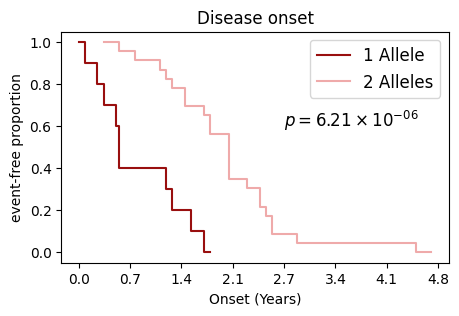

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

onset_fig, ax = plt.subplots(figsize=(5, 3))
count_onset_result.plot_kaplan_meier_curves(ax=ax)
def days_to_years(x, pos):
    return f"{x / 365.25:.1f}"

ax.xaxis.set_major_formatter(FuncFormatter(days_to_years))
ax.set_xlabel("Onset (Years)")
ax.set_ylabel("event-free proportion")
ax.set_title("Disease onset")
s = f"p={count_onset_result.pval:.2e}".replace('e', ' \\times 10^{').replace('+', '') + '}'
ax.text(x=1000, y=0.6, s=f"${s}$", fontsize=12)

legend_labels = ["1 Allele", "2 Alleles"]

# Assuming you already have plotted lines with handles
lines = ax.get_lines()  # Get the line objects
ax.legend(handles=lines, labels=legend_labels, loc="best", fontsize=12);

# Summary

In [15]:
from gpseacs.report import  GPAnalysisResultSummary, GpseaAnalysisReport

m_results = (
    GPAnalysisResultSummary.from_mono(
        result=count_onset_result,
    ),
)

f_results =  (
 GPAnalysisResultSummary.from_multi(
        result=ablation_result,
    ), GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=cntnap2_count_result,
    ), 
)

cohort_name = gene_symbol

report = GpseaAnalysisReport(
    name=cohort_name,
    cohort=cohort,
    mono_results=m_results,
    fet_results=f_results,
    gene_symbol=gene_symbol,
    mane_tx_id=mane_tx_id,
    mane_protein_id=mane_protein_id,
)

In [16]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [17]:
summarizer.process_latex(report=report, protein_fig=CNTNAP2_fig, stats_fig=onset_fig)

Figure saved to ../../supplement/img/CNTNAP2_protein_diagram-draft.pdf
Figure saved to ../../supplement/img/CNTNAP2_stats-draft.pdf
Output to ../../supplement/tex/CNTNAP2_summary_draft.tex
